# cifar10 dataset을 사용해서 이미지 분류 모델 개발

In [47]:
# cifar10 dataset을 사용해서 이미지 분류 모델 개발
# 필요 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras
from keras.callbacks import EarlyStopping

In [48]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.cifar10.load_data()

In [49]:
# 데이터 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())
print(X_test.min(), X_test.max(), y_test.min(), y_test.max())

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
0 255 0 9
0 255 0 9


In [50]:
# 데이터 스케일링
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
# 데이터 스케일링 확인
print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [51]:
# 사전 학습 모델 불러오기
base_model = tf_keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [17]:
# 모델 구조 설계
# 2 4 8 16 32 64 128 256 512 1024 2048 4096

input = tf_keras.Input(shape=(32, 32, 3))
x = base_model(input)
x = tf_keras.layers.Flatten()(x)

x = tf_keras.layers.Dense(4096)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Dropout(0.5)(x)

x = tf_keras.layers.Dense(2048)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Dropout(0.5)(x)

x = tf_keras.layers.Dense(1024)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Dropout(0.4)(x)

x = tf_keras.layers.Dense(256)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Dropout(0.3)(x)

x = tf_keras.layers.Dense(32)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Dropout(0.2)(x)

output = tf_keras.layers.Dense(10, activation='softmax')(x)
full_model = tf_keras.Model(input, output)

full_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             3

 Total params: 27,605,546 (105.31 MB)

 Trainable params: 27,590,634 (105.25 MB)

 Non-trainable params: 14,912 (58.25 KB)

In [18]:
# 모델 학습 설계
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
full_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
fit_history = full_model.fit(X_train_scaled, y_train, batch_size = 256, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 231ms/step - accuracy: 0.2003 - loss: 2.2587 - val_accuracy: 0.1737 - val_loss: 9.9456
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.3407 - loss: 1.6034 - val_accuracy: 0.3572 - val_loss: 2.0955
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.4145 - loss: 1.4255 - val_accuracy: 0.3120 - val_loss: 1.9266
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.4833 - loss: 1.2829 - val_accuracy: 0.3910 - val_loss: 1.7196
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.5491 - loss: 1.1470 - val_accuracy: 0.5986 - val_loss: 1.1077
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.6068 - loss: 1.0338 - val_accuracy: 0.5723 - val_loss: 1.2270
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.6743 - loss: 0.8839 - val_accuracy: 0.6319 - val_loss: 1.2367
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.7487 -

In [20]:
print(full_model.evaluate(X_train_scaled, y_train), full_model.evaluate(X_test_scaled, y_test))
# train: 0.9187999963760376, test: 0.7635999917984009

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9523 - loss: 0.1627
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7650 - loss: 1.5323
[0.40088531374931335, 0.9187999963760376] [1.511152982711792, 0.7635999917984009]


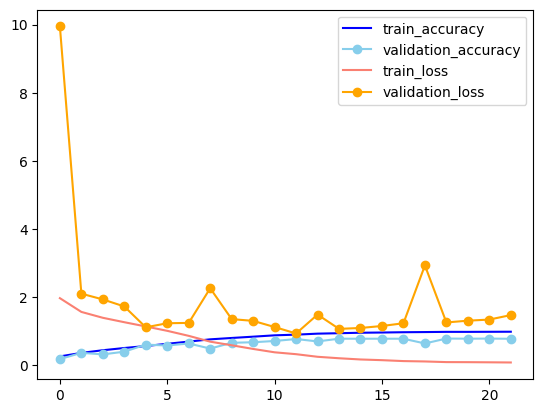

In [21]:
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.plot(fit_history.epoch, fit_history.history['loss'], label = "train_loss", c='salmon')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.legend()
plt.show()

# 모델 개선 시도

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

In [23]:
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-4:]:  # 마지막 4개 레이어 학습 가능
    layer.trainable = True

In [30]:
input = tf_keras.Input(shape=(32, 32, 3))
x = base_model(input)
x = tf_keras.layers.GlobalMaxPooling2D()(x)  # GlobalAveragePooling2D 사용

x = tf_keras.layers.Dense(256)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('leaky_relu')(x)  # leaky_relu 사용
x = tf_keras.layers.Dropout(0.5)(x)

x = tf_keras.layers.Dense(128)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('leaky_relu')(x)  # leaky_relu 사용
x = tf_keras.layers.Dropout(0.4)(x)

x = tf_keras.layers.Dense(64)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('relu')(x)
x = tf_keras.layers.Dropout(0.3)(x)

x = tf_keras.layers.Dense(32)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('relu')(x)
x = tf_keras.layers.Dropout(0.2)(x)

output = tf_keras.layers.Dense(10, activation='softmax')(x)
full_model2 = tf_keras.Model(input, output)

full_model2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_5               │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │              

 Total params: 14,891,498 (56.81 MB)

 Trainable params: 14,890,538 (56.80 MB)

 Non-trainable params: 960 (3.75 KB)

In [33]:
early_stopping2 = EarlyStopping(monitor='val_loss', patience=5)
full_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# 학습 시 데이터 증강 적용
fit_history = full_model2.fit(datagen.flow(X_train_scaled, y_train, batch_size=256),
                              epochs=100,
                              validation_data=(X_test_scaled, y_test),
                              callbacks=[early_stopping2])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 263ms/step - accuracy: 0.4273 - loss: 1.6925 - val_accuracy: 0.7087 - val_loss: 1.1023
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.7502 - loss: 0.8627 - val_accuracy: 0.7785 - val_loss: 0.8329
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 212ms/step - accuracy: 0.7835 - loss: 0.7404 - val_accuracy: 0.7589 - val_loss: 0.9120
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 194ms/step - accuracy: 0.8045 - loss: 0.6624 - val_accuracy: 0.8019 - val_loss: 0.6963
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.8194 - loss: 0.6090 - val_accuracy: 0.8116 - val_loss: 0.6339
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.8299 - loss: 0.5787 - val_accuracy: 0.8043 - val_loss: 0.6862
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 188ms/step - accuracy: 0.8348 - loss: 0.5569 - val_accuracy: 0.8185 - val_loss: 0.6880
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 203ms/step - accuracy: 0.8433 - loss: 0.527

In [35]:
print(full_model2.evaluate(X_train_scaled, y_train), full_model2.evaluate(X_test_scaled, y_test))
# train: 0.9541000127792358, test: 0.8761000037193298

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9560 - loss: 0.1415
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8797 - loss: 0.4753
[0.1503801792860031, 0.9541000127792358] [0.49358150362968445, 0.8761000037193298]


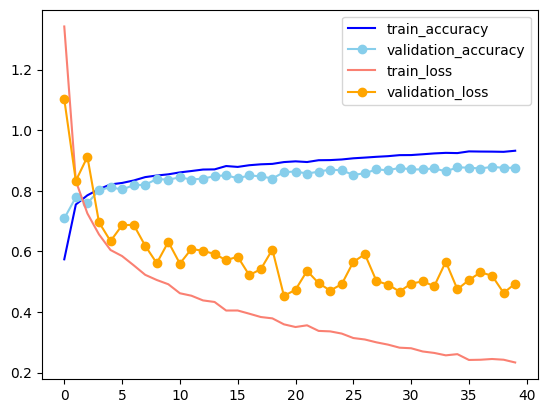

In [36]:
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.plot(fit_history.epoch, fit_history.history['loss'], label = "train_loss", c='salmon')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.legend()
plt.show()

# GlobalMaxPooling2D > Flatten

In [37]:
input = tf_keras.Input(shape=(32, 32, 3))
x = base_model(input)
x = tf_keras.layers.Flatten()(x)  # GlobalAveragePooling2D 사용

x = tf_keras.layers.Dense(256)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('leaky_relu')(x)  # leaky_relu 사용
x = tf_keras.layers.Dropout(0.5)(x)

x = tf_keras.layers.Dense(128)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('leaky_relu')(x)  # leaky_relu 사용
x = tf_keras.layers.Dropout(0.4)(x)

x = tf_keras.layers.Dense(64)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('relu')(x)
x = tf_keras.layers.Dropout(0.3)(x)

x = tf_keras.layers.Dense(32)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.Activation('relu')(x)
x = tf_keras.layers.Dropout(0.2)(x)

output = tf_keras.layers.Dense(10, activation='softmax')(x)
full_model3 = tf_keras.Model(input, output)

full_model3.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,891,498 (56.81 MB)

 Trainable params: 14,890,538 (56.80 MB)

 Non-trainable params: 960 (3.75 KB)

In [41]:
early_stopping3 = EarlyStopping(monitor='val_loss', patience=5)
full_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# 학습 시 데이터 증강 적용
fit_history3 = full_model3.fit(datagen.flow(X_train_scaled, y_train, batch_size=256),
                              epochs=100,
                              validation_data=(X_test_scaled, y_test),
                              callbacks=[early_stopping3])

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 242ms/step - accuracy: 0.6973 - loss: 1.1379 - val_accuracy: 0.8630 - val_loss: 0.6227
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - accuracy: 0.9223 - loss: 0.3546 - val_accuracy: 0.8822 - val_loss: 0.5116
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.9277 - loss: 0.2980 - val_accuracy: 0.8854 - val_loss: 0.4823
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.9317 - loss: 0.2731 - val_accuracy: 0.8695 - val_loss: 0.5809
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 212ms/step - accuracy: 0.9335 - loss: 0.2533 - val_accuracy: 0.8801 - val_loss: 0.4954
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 190ms/step - accuracy: 0.9336 - loss: 0.2490 - val_accuracy: 0.8693 - val_loss: 0.5527
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 201ms/step - accuracy: 0.9379 - loss: 0.2318 - val_accuracy: 0.8873 - val_loss: 0.4799
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.9421 -

In [43]:
print(full_model3.evaluate(X_train_scaled, y_train), full_model3.evaluate(X_test_scaled, y_test))
# train: 0.9736599922180176, test: 0.8867999911308289

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9750 - loss: 0.0863
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8906 - loss: 0.4839
[0.09027193486690521, 0.9736599922180176] [0.4930300712585449, 0.8867999911308289]


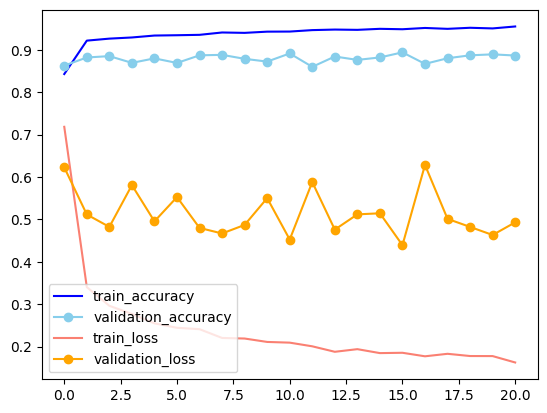

In [44]:
plt.plot(fit_history3.epoch, fit_history3.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(fit_history3.epoch, fit_history3.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.plot(fit_history3.epoch, fit_history3.history['loss'], label = "train_loss", c='salmon')
plt.plot(fit_history3.epoch, fit_history3.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.legend()
plt.show()

# 개선시도

In [52]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_scaled)

# Validation 데이터 증강
val_datagen = ImageDataGenerator()
val_gen = val_datagen.flow(X_test_scaled, y_test, batch_size=256)

# Base 모델 미세조정
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 모델 구성
input = tf_keras.Input(shape=(32, 32, 3))
x = base_model(input)
x = tf_keras.layers.GlobalAveragePooling2D()(x)

x = tf_keras.layers.Dense(256)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.LeakyReLU(alpha=0.1)(x)
x = tf_keras.layers.Dropout(0.4)(x)

x = tf_keras.layers.Dense(128)(x)
x = tf_keras.layers.BatchNormalization()(x)
x = tf_keras.layers.LeakyReLU(alpha=0.1)(x)
x = tf_keras.layers.Dropout(0.3)(x)

output = tf_keras.layers.Dense(10, activation='softmax')(x)
full_model4 = tf_keras.Model(input, output)

# Optimizer 및 Callback 설정
optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max'
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# 모델 컴파일
full_model4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 학습
fit_history4 = full_model4.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=256),
    epochs=100,
    validation_data=val_gen,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 186ms/step - accuracy: 0.4785 - loss: 1.4974 - val_accuracy: 0.5728 - val_loss: 1.5415 - learning_rate: 0.0010
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 75s 169ms/step - accuracy: 0.6496 - loss: 1.0164 - val_accuracy: 0.6519 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step - accuracy: 0.6849 - loss: 0.9199 - val_accuracy: 0.6873 - val_loss: 0.9558 - learning_rate: 0.0010
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.6949 - loss: 0.8819 - val_accuracy: 0.6840 - val_loss: 0.9676 - learning_rate: 0.0010
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.7091 - loss: 0.8382 - val_accuracy: 0.7142 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 165ms/step - accuracy: 0.7245 - loss: 0.7967 - val_accuracy: 0.6899 - val_loss: 0.9557 - learning_rate: 0.0010
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 178ms/step - accuracy: 0.7344 -

In [53]:
print(full_model4.evaluate(X_train_scaled, y_train), full_model4.evaluate(X_test_scaled, y_test))
# train: 0.8261399865150452, test: 0.7538999915122986

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8261 - loss: 0.4911
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7474 - loss: 0.7249
[0.49273067712783813, 0.8261399865150452] [0.7200459837913513, 0.7538999915122986]


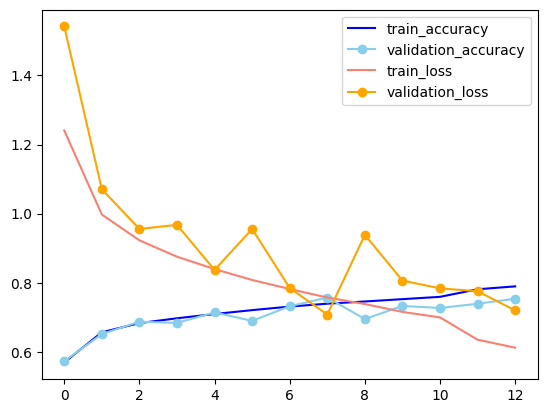

In [54]:
plt.plot(fit_history4.epoch, fit_history4.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(fit_history4.epoch, fit_history4.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.plot(fit_history4.epoch, fit_history4.history['loss'], label = "train_loss", c='salmon')
plt.plot(fit_history4.epoch, fit_history4.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.legend()
plt.show()